# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

if response.status_code == 200:
  print("downloaded successfully")
  new_file = response.text
  with open("response.tsv", "w") as file:
    file.write(new_file)
  df_2 = pd.read_csv("response.tsv", sep="\t")

downloaded successfully


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552


KeyboardInterrupt: 

In [3]:
import json

with open('tweet_json.txt', 'r', encoding='utf-8') as f:
    data = []
    for line in f:
        data.append(json.loads(line))

df_3 = pd.DataFrame(data)
print(df_3)

Empty DataFrame
Columns: []
Index: []


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality issues
1. Handle inconsistent ratings.
2. Remove duplicates.
3. Standardize naming conventions.
4. Extra columns and rows
5. timestamp type must be datetime64[ns] not object
6. Check for and remove irrelevant rows.
7. Validate URL formats.
8. Ensure all names are valid names or marked appropriately.

### Tidiness issues
1. Create a single rating column by combining numerator and denominator
2. Convert categorical variables to category type
3. Standardize column names
4. Remove unnecessary columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [5]:
# Make copies of original pieces of data
df_1_cleaned = df_1

### Fix Quality issues

In [6]:
import re

# 1. Handle inconsistent ratings: Remove rows with numerator > denominator and denominator == 0
df_1_cleaned = df_1_cleaned[(df_1_cleaned['rating_numerator'] <= df_1_cleaned['rating_denominator']) & (df_1_cleaned['rating_denominator'] != 0)]

# 2. Remove duplicates
df_1_cleaned.drop_duplicates(inplace=True)

# 3. Standardize naming conventions: Convert all names to title case
df_1_cleaned['name'] = df_1_cleaned['name'].apply(lambda x: x.title() if x.isalpha() else x)

# 4. Extra columns and rows
filtered_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                 'retweeted_status_id', 'retweeted_status_user_id',
                 'retweeted_status_timestamp']

df_1_cleaned = df_1[df_1[filtered_cols].isnull().all(axis=1)]

df_1_cleaned = df_1_cleaned.drop(filtered_cols, axis=1)

# 5. timestamp type must be datetime64[ns] not object

df_1_cleaned['timestamp'] = pd.to_datetime(df_1_cleaned['timestamp'], format='%Y-%m-%d %H:%M:%S')

# 6. Check for and remove irrelevant rows
df_1_cleaned = df_1_cleaned[df_1_cleaned['text'].notnull() & df_1_cleaned['source'].notnull()]

# 7. Validate URL formats
def is_valid_url(url):
    regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' # domain...
        r'localhost|' # localhost...
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}|' # ...or ipv4
        r'\[?[A-F0-9]*:[A-F0-9:]+\]?)' # ...or ipv6
        r'(?::\d+)?' # optional port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)
    return re.match(regex, url) is not None

# 8. Ensure all names are valid names or marked appropriately
def valid_name(name):
    if name.isalpha() and name[0].isupper():
        return name
    else:
        return 'None'

df_1_cleaned['name'] = df_1_cleaned['name'].apply(valid_name)

# Verify the final state of the dataframe
print(df_1_cleaned.head())
print(df_1_cleaned.isnull().sum())
print(df_1_cleaned.dtypes)
df_1_cleaned.info()
df_1_cleaned.head()

             tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  r

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Fix Tidiness Issues

In [7]:
# 1. Create a single rating column by combining numerator and denominator
df_1_cleaned['rating'] = df_1_cleaned['rating_numerator'].astype(str) + '/' + df_1_cleaned['rating_denominator'].astype(str)

# 2. Convert categorical variables to category type
df_1_cleaned['doggo'] = df_1_cleaned['doggo'].astype('category')
df_1_cleaned['floofer'] = df_1_cleaned['floofer'].astype('category')
df_1_cleaned['pupper'] = df_1_cleaned['pupper'].astype('category')
df_1_cleaned['puppo'] = df_1_cleaned['puppo'].astype('category')
df_1_cleaned['source'] = df_1_cleaned['source'].astype('category')

# 3. Standardize column names
df_1_cleaned.columns = df_1_cleaned.columns.str.lower().str.replace(' ', '_')

# 4. Remove unnecessary columns
df_1_cleaned.drop(columns=['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# Display the cleaned dataframe
print(df_1_cleaned.head())
print(df_1_cleaned.dtypes)


             tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls   

#### Define

#### Code

In [8]:
df_1_cleaned['timestamp'] = pd.to_datetime(df_1_cleaned['timestamp'], format='%Y-%m-%d %H:%M:%S')

#### Test

In [9]:
df_1_cleaned.info()
df_1_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id         2097 non-null int64
timestamp        2097 non-null datetime64[ns]
source           2097 non-null category
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
rating           2097 non-null object
dtypes: category(1), datetime64[ns](1), int64(1), object(4)
memory usage: 116.9+ KB


,tweet_id,timestamp,source,text,expanded_urls,name,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [22]:
df_1_cleaned.to_csv('twitter_archive_master.csv', index=False)

print("Dataframe saved to twitter_archive_master.csv")

Dataframe saved to twitter_archive_master.csv


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

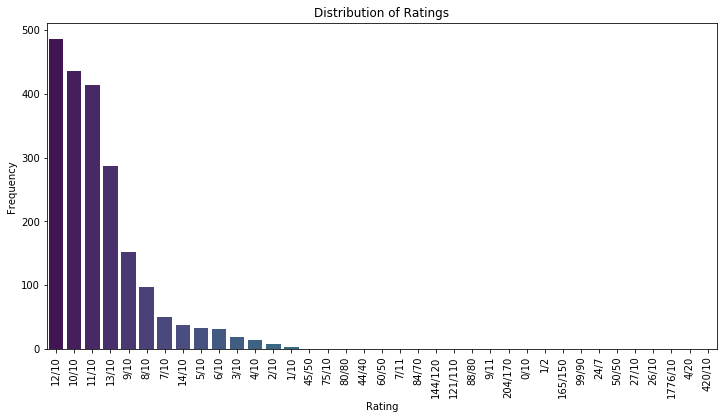

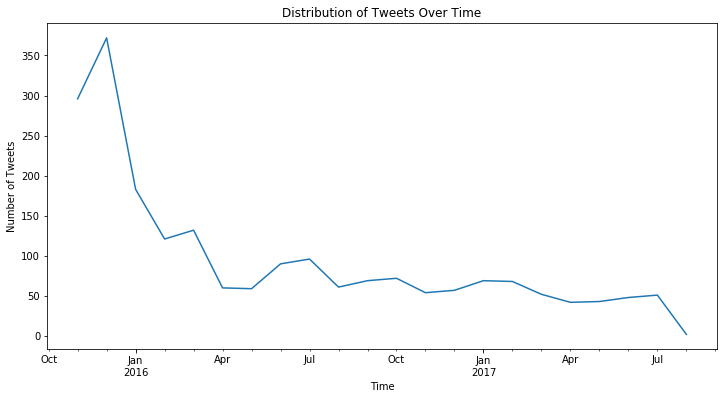

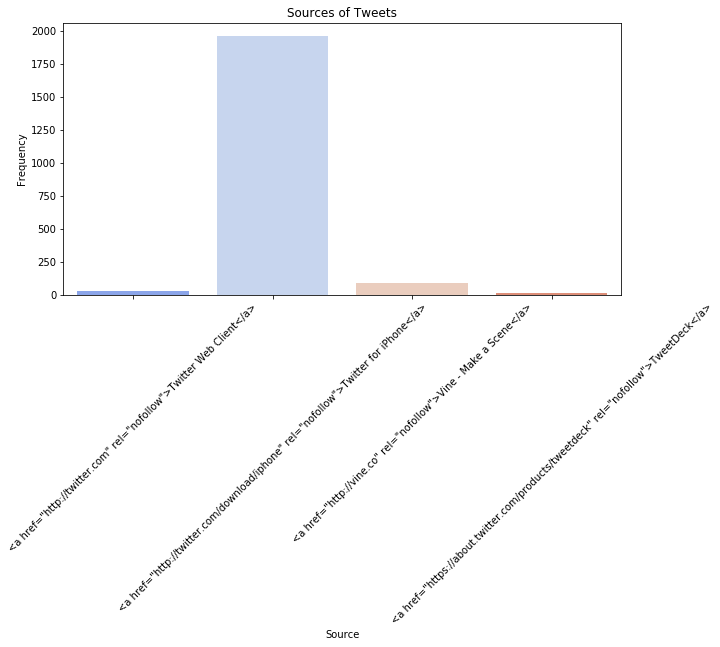

Top 5 most common ratings:
12/10    486
10/10    436
11/10    413
13/10    287
9/10     152
Name: rating, dtype: int64

Distribution of Tweets Over Time:
timestamp
2015-11-30    296
2015-12-31    372
2016-01-31    183
2016-02-29    121
2016-03-31    132
2016-04-30     60
2016-05-31     59
2016-06-30     90
2016-07-31     96
2016-08-31     61
2016-09-30     69
2016-10-31     72
2016-11-30     54
2016-12-31     57
2017-01-31     69
2017-02-28     68
2017-03-31     52
2017-04-30     42
2017-05-31     43
2017-06-30     48
2017-07-31     51
2017-08-31      2
Freq: M, Name: text, dtype: int64

Top 5 sources of tweets:
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Insight 1: Distribution of Ratings
rating_counts = df_1_cleaned['rating'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Insight 2: Distribution of Tweets Over Time
df_1_cleaned['timestamp'] = pd.to_datetime(df_1_cleaned['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_1_cleaned.set_index('timestamp', inplace=True)
tweets_over_time = df_1_cleaned['text'].resample('M').count()

plt.figure(figsize=(12, 6))
tweets_over_time.plot()
plt.title('Distribution of Tweets Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.show()

# Insight 3: Sources of Tweets
source_counts = df_1_cleaned['source'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='coolwarm')
plt.title('Sources of Tweets')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Print out the insights
print("Top 5 most common ratings:")
print(rating_counts.head())

print("\nDistribution of Tweets Over Time:")
print(tweets_over_time)

print("\nTop 5 sources of tweets:")
print(source_counts.head())


### Insights:
1.Distribution of Ratings: Understanding the distribution of ratings can provide insight into how often different ratings are given and their relative frequencies.

2.Common Dog Stages: Analyzing the frequency of each dog stage can help identify which dog stages are most commonly mentioned in tweets.

3.Sources of Tweets: Knowing which platforms are most used to post tweets can provide insight into user behavior.


### Visualization

In [20]:
df_1.info()
df_1.describe()
df_1["tweet_id"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [21]:
df_2.info()
df_2.describe()
df_2["tweet_id"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [23]:
df_1_cleaned.info()
df_1_cleaned.describe()
df_1_cleaned["tweet_id"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
sentiment_positive    2097 non-null int64
sentiment_negative    2097 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 325.7+ KB


749075273010798592    1
760539183865880579    1
715696743237730304    1
691820333922455552    1
776477788987613185    1
760521673607086080    1
880095782870896641    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
769212283578875904    1
738883359779196928    1
743510151680958465    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
666051853826850816    1
809920764300447744    1
818259473185828864    1
759923798737051648    1
670093938074779648    1
672082170312290304    1
667160273090932737    1
756651752796094464    1
743545585370791937    1
671163268581498880    1
770655142660169732    1
793120401413079041    1
                     ..
794926597468000259    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
870308999962521604    1
872261713294495745    1
693155686491000832    1
6679114255626690